# R0 for 152 Countries
Amy Chung Mar, 31, 2020

Literature found:

**Joe Hilton & Matt J Keeling**

**Estimation of country-level basic reproductive ratios for novel Coronavirus (COVID-19) using synthetic contact matrices**
https://www.medrxiv.org/content/10.1101/2020.02.26.20028167v1

Using data from China, the authors estimated a scaling factor for each country (152 countries). The scaling factors serve as a multiplicative ratio of the basic reproductive number (R0) from China. For example, assuming the R0 in China is 2.35. The estimated scaling factor of the US is 0.97382, so the R0 in the US will be calculated as 2.35*0.97382.

In the following, I used 2.35 as the R0 in China to calculate R0 for all countries. The number, 2.35, is derived from the results in the following literature:

**Early dynamics of transmission and control of COVID-19: a mathematical modelling study**
https://www.medrxiv.org/content/10.1101/2020.01.31.20019901v2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [2]:
# download the scaling factors file from a link, save to a local file called "scale_factor.xlsx"
url = 'https://www.medrxiv.org/highwire/filestream/72706/field_highwire_adjunct_files/0/2020.02.26.20028167-1.xlsx'
urllib.request.urlretrieve(url, 'scale_factor.xlsx')

('scale_factor.xlsx', <http.client.HTTPMessage at 0x121241f28>)

In [3]:
# read the downloaded excel file
scale_df = pd.read_excel("scale_factor.xlsx")
scale_df.head()

,Country,Scaling Factor (no age-dependent susceptibility),Scaling Factor (age-dependent susceptibility from Li et al 2020),Scaling Factor (age-dependent susceptibility from Yang et al 2020)
0,Albania,1.099685,1.118412,0.903497
1,Algeria,1.196914,0.611886,0.622405
2,Andorra,0.859647,1.077546,0.956037
3,Antigua and Barbuda,1.142694,0.781998,0.917113
4,Argentina,0.972235,0.918620,0.872589


In [4]:
# FUNCTIONS
def initial_data_analysis(data):
    """
    1. Check the dimension of a pd.DataFrame
    2. Check how many null values are there in each column of a dataframe.
    3. Calculate the summary statistics of continuous variables
       (count, mean, standard deviation, minimum, maximum, quartiles)
    input: a pandas dataframe
    return: 1. a tuple showing the dimension of data, (n_row, n_col)
            2. a pd.Series showing how many null values are there in each column
            3. a pd.Series or a pd.DataFrame, showing the summary statistics of continuous variables
    """
    # check dimension of the data
    n_row = data.shape[0]
    n_col = data.shape[1]
    
    # check null values for each variable
    null = data.isnull().sum()
    
    # summary statistics for continuous variables
    stats = data.describe()
    
    return (n_row, n_col), null, stats


def select_columns(data, col_list):
    """
    Select a subset of columns from a dataframe
    input: data - a pandas dataframe
           col_list - a list of columns' names
    
    return: a pandas dataframe consists of only the columns in col_list
    """
    return data.loc[:, col_list]

def create_R0(data, scale_col, china_R0):
    """
    Create a new column called "estimaed_R0" in a dataframe by multiplying scale_col with china_R0
    input: data - a pandas dataframe
           scale_col - a string of the column name of the scaling factor
           china_R0 - a float representing the R0 of China
    """
    data["estimated_R0"] = data[scale_col]*china_R0
    return data


def histogram(continuous_var, title, xlable, ylabel, bin_size=40, figure_size=(10,7)):
    """
    Create a histogram for a continuous variable
    input: continuous_var - a pandas series of a continuous variables
           title - a string, the title of the histogram
           xlabel - a string, the label of the x-axis
           ylabel - a string, the label of the y-axis
           bin_size - a integer, number of bins of the histogram
           figure_size - a tuple of the figure size, Ex:(10,7)
    """
    # create a histogram for estimated_R0
    plt.figure(figsize=figure_size)

    plt.hist(continuous_var, bins = bin_size)

    plt.title(title, fontsize=20)
    plt.xlabel(xlable, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18) 
    return plt.show()

def top_n(data, cols, n=10, ascend=False):
    """
    Show the top n rows based on sorting the values of cols
    input: data - a pandas dataframe
           cols - a string or a list of strings, the names of the columns by which you want to sort the data
           n - a integer, the number of rows you want to show
           ascend - boolean, True if you want to sort the cols in ascending, 
                             False if you want to sort the cols in descending
    return: a pandas dataframe
    """
    return data.sort_values(cols, ascending=ascend).head(n)

def outliers(data, col, n_std=3):
    """
    Show records that are considered outliers based on col and n_std standard deviations away from the mean
    input: data - a pandas dataframe
           col - a string, the name of the column of which you want to check for outliers 
           n_std - a float or integer, the number of standard deviations away from the mean are considered outliers
    return: a pandas dataframe showing records of outliers
    """
    upper = data[col].mean() + n_std*data[col].std()
    lower = data[col].mean() - n_std*data[col].std()
    df_outliers = data.loc[(data[col] > upper)|(data[col] < lower),:]
    return df_outliers

In [5]:
# perform initial_data_anaylsis on scale_df
dimension, null_series, summary_stats = initial_data_analysis(scale_df)
print(f"The dataframe has {dimension[0]} observations and {dimension[1]} columns.")
print(f"Number of null values for each column:", null_series, sep="\n")
summary_stats

The dataframe has 152 observations and 4 columns.
Number of null values for each column:
Country                                                               0
Scaling Factor (no age-dependent susceptibility)                      0
Scaling Factor (age-dependent susceptibility from Li et al 2020)      0
Scaling Factor (age-dependent susceptibility from Yang et al 2020)    0
dtype: int64


,Scaling Factor (no age-dependent susceptibility),Scaling Factor (age-dependent susceptibility from Li et al 2020),Scaling Factor (age-dependent susceptibility from Yang et al 2020)
count,152.000000,152.000000,152.000000
mean,1.156017,1.017599,0.918145
std,0.257297,0.524736,0.306610
min,0.508475,0.533464,0.449246
25%,0.957231,0.696171,0.737659
50%,1.121259,0.766457,0.853264
75%,1.327988,1.247486,1.059305
max,1.896740,4.385591,3.225609


In [6]:
# select only the columns needed to calculate R0
cols = ["Country", "Scaling Factor (age-dependent susceptibility from Yang et al 2020)"]
R0_df = select_columns(scale_df, cols)
R0_df.head()

,Country,Scaling Factor (age-dependent susceptibility from Yang et al 2020)
0,Albania,0.903497
1,Algeria,0.622405
2,Andorra,0.956037
3,Antigua and Barbuda,0.917113
4,Argentina,0.872589


In [7]:
# assuming the R0 in China is 2.35
# calculate the estimated_R0 for each country by multiplying scaling factors with 2.35
R0_df = create_R0(R0_df, "Scaling Factor (age-dependent susceptibility from Yang et al 2020)", 2.350)
R0_df.head()

,Country,Scaling Factor (age-dependent susceptibility from Yang et al 2020),estimated_R0
0,Albania,0.903497,2.123217
1,Algeria,0.622405,1.462651
2,Andorra,0.956037,2.246687
3,Antigua and Barbuda,0.917113,2.155215
4,Argentina,0.872589,2.050583


In [8]:
# perform initial_data_anaylsis on R0_df
dimension, null_series, summary_stats = initial_data_analysis(R0_df)
print(f"The dataframe has {dimension[0]} observations and {dimension[1]} columns.")
print(f"Number of null values for each column:", null_series, sep="\n")
summary_stats

The dataframe has 152 observations and 3 columns.
Number of null values for each column:
Country                                                               0
Scaling Factor (age-dependent susceptibility from Yang et al 2020)    0
estimated_R0                                                          0
dtype: int64


,Scaling Factor (age-dependent susceptibility from Yang et al 2020),estimated_R0
count,152.000000,152.000000
mean,0.918145,2.157640
std,0.306610,0.720533
min,0.449246,1.055727
25%,0.737659,1.733499
50%,0.853264,2.005171
75%,1.059305,2.489366
max,3.225609,7.580182


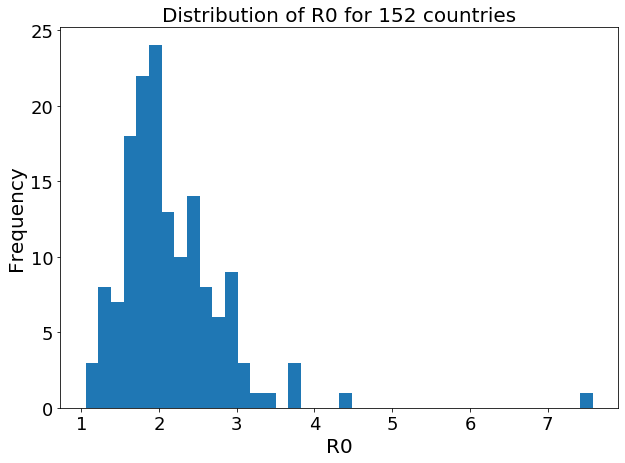

In [9]:
# look at the distribution of the R0
histogram(R0_df["estimated_R0"], "Distribution of R0 for 152 countries", "R0", "Frequency")

In [10]:
# top 10 countries with the highest R0
top_n(R0_df, "estimated_R0")

,Country,Scaling Factor (age-dependent susceptibility from Yang et al 2020),estimated_R0
86,Monaco,3.225609,7.580182
104,Poland,1.864179,4.380820
64,Italy,1.625237,3.819308
79,Luxembourg,1.596044,3.750703
66,Japan,1.573948,3.698777
106,Qatar,1.431566,3.364180
22,Bulgaria,1.357157,3.189319
44,Finland,1.309665,3.077713
13,Belgium,1.297550,3.049243
93,Netherlands,1.287439,3.025482


In [11]:
# 10 countries with the lowest R0
top_n(R0_df, "estimated_R0", ascend=True)

,Country,Scaling Factor (age-dependent susceptibility from Yang et al 2020),estimated_R0
113,Sao Tome and Principe,0.449246,1.055727
112,Samoa,0.453400,1.065490
149,Yemen,0.483173,1.135458
145,Uzbekistan,0.533814,1.254463
135,Tonga,0.538491,1.265454
67,Jordan,0.554620,1.303357
129,Syria,0.566539,1.331367
134,East Timor,0.566842,1.332078
99,Pakistan,0.573030,1.346621
24,Cabo Verde,0.577207,1.356437


In [12]:
# show outliers (countries whose R0 is 3 standard deviation away from the mean)
outliers(R0_df, "estimated_R0")

,Country,Scaling Factor (age-dependent susceptibility from Yang et al 2020),estimated_R0
86,Monaco,3.225609,7.580182
104,Poland,1.864179,4.380820
